<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Notebook%20/%20Exerc%C3%ADcio%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercício 9
# 1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso)

url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/FIFA.csv'
df_Fifa = pd.read_csv(url)

# Indexando o dataframe pela variável 'ID'
df_Fifa.set_index('ID', inplace=True)

# Exercício 9
# 5.a) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo. 
nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]

# Seguindo o PEP em que as letras são minúsculas, portanto, convertendo 'df_Fifa' para df_fifa':
df_fifa = df_Fifa.copy()
df_fifa.head()

,unnamed: 0,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df_fifa.shape

(18207, 88)

In [2]:
# Exercício 9
# 2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
# Minha resposta: colunas com foto, logo do país e do clube, irrelevantes  para análise de dados e ocupam espaço/memória/tempo

df_fifa = df_fifa.drop(['unnamed: 0','photo','flag','club logo', 'real face','jersey number','loaned from'], axis = 1)
df_fifa.shape

(18207, 81)

In [ ]:
# Exercício 9
# 3. Qual o dtype de cada variável/atributo do dataframe?
# OBS.: df_fifa.info => mostra todas as colunas sem truncar, qtde de variáveis de cada tipo e uso de memória, vide execução na célula seguinte
df_fifa.dtypes      

In [10]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      18207 non-null  object 
 1   age                       18207 non-null  int64  
 2   nationality               18207 non-null  object 
 3   overall                   18207 non-null  int64  
 4   potential                 18207 non-null  int64  
 5   club                      17966 non-null  object 
 6   value                     18207 non-null  object 
 7   wage                      18207 non-null  object 
 8   special                   18207 non-null  int64  
 9   preferred foot            18159 non-null  object 
 10  international reputation  18159 non-null  float64
 11  weak foot                 18159 non-null  float64
 12  skill moves               18159 non-null  float64
 13  work rate                 18159 non-null  object 
 14  

In [3]:
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'body type', 'position',
       'joined', 'contract valid until', 'height', 'weight', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy', 'shortpassing',
       'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
       'ballcontrol', 'acceleration', 'sprintspeed', 'agility', 'reactions',
       'balance', 'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'release clause']

In [9]:
# Exercício 9
# 4. Se alguma variável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

# Colunas 'value' e 'wage' são object e apresentam primeiro caracter '€' e último caracter 'M' (million) e 'K' (thousand)
df_fifa[['value','wage','release clause']].tail()

,value,wage,release clause
ID,,,
238813,€60K,€1K,€143K
243165,€60K,€1K,€113K
241638,€60K,€1K,€165K
246268,€60K,€1K,€143K
246269,€60K,€1K,€165K


In [58]:
# Marcelo Fernandes de Oliveira postou em 13/10/2020, às 16h56, durante Aula 08:
# usando regex em função:

df = df_fifa.copy()

In [59]:
# "corrigido"
import re
def expand_number(input_compact: str):
 
    # dicionário de conversão (definir sufixos sempre em maiúsculo)
    repl_dict = {'K': 1e3, 'M': 1e6, 'B': 1e9, }
 
    # se não for do tipo texto
    if type(input_compact) != str:
        return input_compact
 
    # obter os grupos do string (prefixo, número, abreviação)  
    prog = re.compile(rf"^([RUS$€£]+)?\s*?([\d\.]+)\s*?([{''.join(repl_dict.keys())}])?$", re.IGNORECASE) 
    grp = prog.match(input_compact.upper())
 
    # obter o multiplicador baseado no dicionário de substituição
    mult = repl_dict.get(grp.group(3), 1)
    return float(grp.group(2)) * float(mult)

In [29]:
import re
def expand_number(input_compact: str):

    # dicionário de conversão (definir sufixos sempre em maiúsculo)
    repl_dict = {'K': 1e3, 'M': 1e6, 'B': 1e9, }

    # se for vazio ou não tiver abreviação numérica
    if not input_compact:
        return input_compact

    # obter os grupos do string (prefixo, número, abreviação)  [KMB]
    prog = re.compile(rf"^([RUS$€£]+)?\s*?([\d\.]+)\s*?([{''.join(repl_dict.keys())}])?$", re.IGNORECASE) 
    grp = prog.match(input_compact.upper())

    # obter o multiplicador baseado no dicionário de substituição
    mult = repl_dict.get(grp.group(3), 1)
    return float(grp.group(2)) * float(mult)

print('\nUsando map:')
%timeit df['value'].map(expand_number)

print('\nUsando List Comprehension:')
%timeit [expand_number(x) for x in df['value'].values]


Usando map:
10 loops, best of 3: 49.5 ms per loop

Usando List Comprehension:
10 loops, best of 3: 46.7 ms per loop


In [60]:
df['release clause'] = df['release clause'].apply(expand_number)
df[['release clause']].head()

,release clause
ID,
158023,226500000.0
20801,127100000.0
190871,228100000.0
193080,138600000.0
192985,196400000.0


In [61]:
# aplicando a função acima definida por Marcelo Fernandes de Oliveira:

df['value'] = df['value'].apply(expand_number)
df['wage'] = df['wage'].apply(expand_number)

df_fifa = df.copy()
df_fifa[['value','wage']]


,value,wage
ID,,
158023,110500000.0,565000.0
20801,77000000.0,405000.0
190871,118500000.0,290000.0
193080,72000000.0,260000.0
192985,102000000.0,355000.0
...,...,...
238813,60000.0,1000.0
243165,60000.0,1000.0
241638,60000.0,1000.0


In [63]:
df_fifa[['value','wage','release clause']].tail()

,value,wage,release clause
ID,,,
238813,60000.0,1000.0,143000.0
243165,60000.0,1000.0,113000.0
241638,60000.0,1000.0,165000.0
246268,60000.0,1000.0,143000.0
246269,60000.0,1000.0,165000.0


In [ ]:
pd.unique(df['wage'])

array([565000., 405000., 290000., 260000., 355000., 340000., 420000.,
       455000., 380000.,  94000., 205000., 125000., 285000., 225000.,
       145000., 240000., 315000., 200000., 130000., 300000., 215000.,
       100000., 255000., 165000., 265000., 160000., 150000., 245000.,
       110000.,  77000., 115000., 210000., 195000., 230000., 250000.,
       135000., 155000., 180000., 175000., 190000., 185000.,  21000.,
        82000.,  73000.,  92000.,  88000.,  96000., 170000.,  66000.,
       235000.,  28000., 105000.,  38000.,  81000.,  57000.,  15000.,
        63000.,  22000.,  84000., 120000.,  90000.,  72000.,  93000.,
        45000.,  74000.,  51000.,  42000.,  31000.,  75000.,  25000.,
       140000.,  41000.,  78000.,  53000.,  95000.,  80000.,  43000.,
        60000.,  85000.,  64000.,  67000.,  18000.,  70000.,  91000.,
        20000.,  49000.,  87000.,  86000.,  26000.,  29000.,  55000.,
        35000.,  33000.,  56000.,  30000.,  11000.,  59000.,  23000.,
        46000.,  390

In [ ]:
df['wage'].

AttributeError: ignored

pandas.core.series.Series

In [ ]:
df2=pd.DataFrame(_41)

In [ ]:
df2

,wage
1000.0,4900
2000.0,2827
3000.0,1857
4000.0,1255
5000.0,869
...,...
380000.0,1
230000.0,1
565000.0,1
200000.0,1


In [32]:
df_fifa = df.copy()
df_fifa[['value','wage']]

In [ ]:
df_fifa[['value','wage']]

,value,wage
ID,,
158023,110500000.0,565000.0
20801,77000000.0,405000.0
190871,118500000.0,290000.0
193080,72000000.0,260000.0
192985,102000000.0,355000.0
...,...,...
238813,60000.0,1000.0
243165,60000.0,1000.0
241638,60000.0,1000.0


In [ ]:
df_fifa.columns

In [ ]:
df_fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
        'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

In [ ]:
# Tratando as variáveis tipo object com formato '83+4' (exemplo) para numeric '87'(resultado da soma '83+4')

l_colunas_object = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']                     

# type(l_nome_colunas_object) é 'list'
# l_antes => lista que receberá os string antes do caracter '+'
# l_depois => lista que receberá os string depois do caracter '+'

for i in l_colunas_object:
  l_antes = []
  l_depois = []
  l_antes = df_fifa[i].str.split('+', n=2, expand= True)[0]
  l_depois = df_fifa[i].str.split('+', n=2, expand= True)[1]
  l_antes = pd.to_numeric(antes)
  l_depois = pd.to_numeric(depois)
  df_fifa[i] = l_antes + l_depois

df_fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
         'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
20801,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
190871,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


In [ ]:
# Tratando as variáveis tipo object com formato '83+4' (exemplo) para numeric '87'(resultado da soma '83+4')

l_nome_colunas_object = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']                     

# type(l_nome_colunas_object) é 'list'
# l_num[0] => lista na posição 0 de l_num que receberá lista dos string antes do caracter '+'
# l_num[1] => lista na posição 1 de l_num que receberá lista dos string depois do caracter '+'

for i in l_nome_colunas_object:
  l_num = [0,1]
  l_num[0] = df_fifa[i].str.split('+', n=2, expand= True)[0]
  l_num[1] = df_fifa[i].str.split('+', n=2, expand= True)[1]
  l_num[0]=pd.to_numeric(l_num[0])
  l_num[1]=pd.to_numeric(l_num[1])
  df_fifa[i]=l_num[0] + l_num[1]

df_fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
         'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
20801,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
190871,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


In [ ]:
# Exercício 9
# 5.a) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo.
# resolvido lá no início

In [ ]:
# Exercício 9
# 5.b) Há Missing values nos dados? 
# 5.c) Se sim, qual sua proposta (proposta do grupo) para tratar esses Missing values?

In [ ]:
# Sim, há Missing values pois ao rodar df_fifa.info() várias colunas indicam valores non-null menores que o número total de linhas (18207 linhas).

s_nan = df_fifa.isna().sum()          # df_fifa.isnull().sum()

In [ ]:
df_nan = pd.DataFrame(s_nan)

In [ ]:
df_nan.head(50)

In [ ]:
df_nan.tail(31)

In [ ]:
df_nan.pivot('qtde de NaNs', columns=)

TypeError: ignored

In [ ]:
df_nan.sum()

0    59933
dtype: int64

In [ ]:
df_fifa[df_fifa.isna()]

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
_213.count()

name              0
age               0
nationality       0
overall           0
potential         0
                 ..
gkhandling        0
gkkicking         0
gkpositioning     0
gkreflexes        0
release clause    0
Length: 81, dtype: int64

In [ ]:
# 6. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
df_fifa.head()

In [ ]:
df_fifa.groupby('nationality')['nationality'].count()       # vide abaixo value_counts (tb resulta em uma série) e Counter (resulta em um dicionário)

nationality
Afghanistan      4
Albania         40
Algeria         60
Andorra          1
Angola          15
              ... 
Uzbekistan       2
Venezuela       67
Wales          129
Zambia           9
Zimbabwe        13
Name: nationality, Length: 164, dtype: int64

In [ ]:
type(_121)

In [ ]:
df_fifa.value_counts(['nationality'])     # igual a: df_Fifa['nationality'].value_counts()

nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Puerto Rico       1
St Lucia          1
Qatar             1
South Sudan       1
Mauritius         1
Length: 164, dtype: int64

In [ ]:
type(_6)

In [ ]:
# Dúvida: como transformar pd series em tabela como feito abaixo com o Counter?

# Descobri!!!
# pega o index e o values da series e aplica o pd.Dataframe

In [ ]:
from collections import Counter
d_nationality = Counter(df_fifa['nationality'])     # Counter retorna um dicionário

In [ ]:
d_nationality

Counter({'Afghanistan': 4,
         'Albania': 40,
         'Algeria': 60,
         'Andorra': 1,
         'Angola': 15,
         'Antigua & Barbuda': 4,
         'Argentina': 937,
         'Armenia': 10,
         'Australia': 236,
         'Austria': 298,
         'Azerbaijan': 5,
         'Barbados': 3,
         'Belarus': 4,
         'Belgium': 260,
         'Belize': 1,
         'Benin': 15,
         'Bermuda': 2,
         'Bolivia': 30,
         'Bosnia Herzegovina': 61,
         'Botswana': 1,
         'Brazil': 827,
         'Bulgaria': 32,
         'Burkina Faso': 16,
         'Burundi': 3,
         'Cameroon': 90,
         'Canada': 64,
         'Cape Verde': 19,
         'Central African Rep.': 3,
         'Chad': 2,
         'Chile': 391,
         'China PR': 392,
         'Colombia': 618,
         'Comoros': 6,
         'Congo': 25,
         'Costa Rica': 30,
         'Croatia': 126,
         'Cuba': 4,
         'Curacao': 14,
         'Cyprus': 8,
         'Czech Republic'

In [ ]:
d_nationality.keys()

In [ ]:
d_nationality.values()

In [ ]:
df_nationality = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values()})

In [ ]:
df_nationality        # não está em ordem decrescente de qtde de jogadores

In [ ]:
df_nationality.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality

,nationality,num_jogadores
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
...,...,...
159,New Caledonia,1
160,Fiji,1
161,São Tomé & Príncipe,1
162,United Arab Emirates,1


In [ ]:
# 7. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality')
# Resolução de 2 jeitos

In [ ]:
df_nat_age = df_fifa[['nationality','age']]

In [ ]:
df_nat_age

In [ ]:
df_nat_age.shape[0]

In [ ]:
df_nationality.shape[0]

In [ ]:
df_nat_md_age = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values(), 'soma_idades': 0})

In [ ]:
df_nat_md_age.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:

# Calculando a média de idade dos jogadores por país "na unha" (sem usar 'groupby'):

# df_nat_age.shape[0]       # 18207
# df_nationality2.shape[0]   # 164

df_nationality2 = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values(), 'soma_idades': 0})
linha_1 = 0
while linha_1 < df_nationality2.shape[0]: # 164
  soma_age = 0
  linha_2 = 0
  while linha_2 < df_nat_age.shape[0]:  # 18207
    if df_nat_age.iat[linha_2,0] == df_nationality2.iat[linha_1,0]:
      soma_age = soma_age + df_nat_age.iat[linha_2,1]
    linha_2 = linha_2 + 1
  df_nationality2.iat[linha_1,2] = soma_age 
linha_1 = linha_1 + 1
  

In [ ]:
df_nationality2

In [ ]:
df_nationality2['media_idade_nationality'] = round(df_nationality2['soma_idades'] / df_nationality2['num_jogadores'], 2)

In [ ]:
df_nationality2

In [ ]:
df_nationality2.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality2

In [ ]:
# Calculando o mesmo exercício 9
# 8. média de idade dos jogadores por país, mas usando o groupby
nat_age_soma = df_fifa.groupby('nationality')['age'].sum()

In [ ]:
nat_age_soma.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Wales', 'Zambia', 'Zimbabwe'],
      dtype='object', name='nationality', length=164)

In [ ]:
nat_age_soma.values

array([   90,   961,  1623,    28,   388,    91, 24555,   268,  5760,
        7347,   130,    83,   115,  6327,    25,   391,    55,   766,
        1586,    20, 22846,   859,   402,    70,  2210,  1552,   521,
          77,    45,  9804, 10225, 15599,   159,   599,   792,  3135,
          95,   355,   192,  2676,  1339,  8113,    46,  1082,   836,
         131, 39938,   127,    54,   353,    32,   502,   145,    30,
        1659, 22499,   391,   348,   625, 29157,  2697,  2497,    25,
          30,    80,   765,   347,    82,   239,   429,    56,   970,
        1216,   748,    17,   429,   176,   395, 18202,  2518,   900,
       12504,    23,   105,   248,   114,  8828,   774,    31,   174,
          29,    25,   100,    76,   199,   186,   330,  1064,    25,
          92,    26,  8901,   118,   575,   102,  2201,   104,    74,
       10872,    30,  1067,    58,    74,  2791,  1995,  8202,    36,
          31,   396,  2218,   957,    47,  8596,  8295,    34,    24,
        9078,  1372,

In [ ]:
nat_nat_numjog = df_fifa.groupby('nationality')['nationality'].count()

In [ ]:
nat_nat_numjog.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Wales', 'Zambia', 'Zimbabwe'],
      dtype='object', name='nationality', length=164)

In [ ]:
nat_nat_numjog.values

array([   4,   40,   60,    1,   15,    4,  937,   10,  236,  298,    5,
          3,    4,  260,    1,   15,    2,   30,   61,    1,  827,   32,
         16,    3,   90,   64,   19,    3,    2,  391,  392,  618,    6,
         25,   30,  126,    4,   14,    8,  100,   52,  336,    2,   43,
         31,    5, 1662,    5,    2,   13,    1,   20,    6,    1,   67,
        914,   15,   15,   26, 1198,  114,  102,    1,    1,    3,   31,
         15,    3,   10,   16,    2,   38,   47,   30,    1,   17,    7,
         14,  702,  100,   32,  478,    1,    4,   10,    4,  335,   33,
          1,    6,    1,    1,    4,    3,    8,    8,   12,   43,    1,
          4,    1,  366,    5,   23,    4,   85,    4,    3,  453,    1,
         44,    2,    3,  121,   80,  341,    1,    1,   15,   85,   37,
          2,  350,  322,    1,    1,  368,   54,   79,    1,  340,  286,
        130,  126,    6,   54,   55,   71,    1, 1072,    3,    1,    3,
          4,  397,  220,    9,    1,    3,    5,   

In [ ]:
nat_numjog_somaidade = pd.DataFrame({'nationality': nat_nat_numjog.index, 'num_jogadores': nat_nat_numjog.values, 'soma_idades': nat_age_soma.values})

In [ ]:
nat_numjog_somaidade

,nationality,num_jogadores,soma_idades
0,Afghanistan,4,90
1,Albania,40,961
2,Algeria,60,1623
3,Andorra,1,28
4,Angola,15,388
...,...,...,...
159,Uzbekistan,2,59
160,Venezuela,67,1629
161,Wales,129,3191
162,Zambia,9,200


In [ ]:
nat_numjog_somaidade['media_idade_nationality'] = round(nat_numjog_somaidade['soma_idades'] / nat_numjog_somaidade['num_jogadores'],2)

In [ ]:
nat_numjog_somaidade.sort_values(by='num_jogadores', ascending=False)     # Resposta item 8.

,nationality,num_jogadores,soma_idades,media_idade_nationality
46,England,1662,39938,24.03
59,Germany,1198,29157,24.34
139,Spain,1072,27149,25.33
6,Argentina,937,24555,26.21
55,France,914,22499,24.62
...,...,...,...,...
74,Indonesia,1,17,17.00
63,Guam,1,30,30.00
141,St Lucia,1,24,24.00
62,Grenada,1,25,25.00


In [ ]:
# df_fifa.groupby('nationality')['nationality'].count()
# nationality
# Afghanistan      4

# df_fifa.groupby('nationality')['age'].sum()
# nationality
# Afghanistan      90




In [ ]:
# 9. Qual o número de jogadores por idade?

df_fifa.groupby('age')['age'].count()

In [ ]:
# Resposta item 9) número de jogadores por idade
df_numjog_idade = pd.DataFrame({'idade':(df_fifa.groupby('age')['age'].count()).index, 'num_jogadores':(df_fifa.groupby('age')['age'].count()).values})
df_numjog_idade

In [ ]:
# 10. Quantos jogadores possuem cada clube?

df_fifa.head(1)

In [ ]:
df_fifa['club']

In [ ]:
_160.unique()

In [ ]:
_162.size

In [ ]:
df_fifa.groupby('club')['club'].count()     # retorna valores 'not NaN' => 651 ( com 'NaN', resultado retorna 652, vide abaixo)

club
 SSV Jahn Regensburg     29
1. FC Heidenheim 1846    28
1. FC Kaiserslautern     26
1. FC Köln               28
1. FC Magdeburg          26
                         ..
Zagłębie Sosnowiec       25
Çaykur Rizespor          30
Örebro SK                27
Östersunds FK            22
Śląsk Wrocław            25
Name: club, Length: 651, dtype: int64

In [ ]:
_172.index

In [ ]:
_173.unique()

In [ ]:
_158.size

In [ ]:
l1 = pd.Series((df_fifa.groupby('club')['club'].count()).index)

In [ ]:
l2 = pd.Series((df_fifa['club'].unique()))      # retorna inclusive valores NaN => 652

In [ ]:
l1

In [ ]:
l2

In [ ]:
(df_fifa['club'].unique()).size

652

In [ ]:
l2[l2.isnull()]

In [ ]:
l2[85]

In [ ]:
# Resposta do Exercício 9.10)
# 10. Quantos jogadores possuem cada clube? São 651 clubes com 17966 jogadores (241 estão sem clube)
df_club_numjog = pd.DataFrame({'club': (df_fifa.groupby('club')['club'].count()).index, 'num_jogadores': (df_Fifa.groupby('club')['club'].count()).values})

In [ ]:
df_club_numjog

,club,num_jogadores
0,Borussia Dortmund,33
1,Eintracht Frankfurt,33
2,Tottenham Hotspur,33
3,Liverpool,33
4,TSG 1899 Hoffenheim,33
...,...,...
646,Grêmio,20
647,Sport Club do Recife,20
648,Limerick FC,19
649,Sligo Rovers,19


In [ ]:
df_club_numjog['num_jogadores'].sum()     
# 18207 => qtde de jogadores
# 17966 => qtde de jogadores com 'club' not NaN
# 18207 - 17966 = 241 => qtde de jogadores com 'club' NaN

17966

In [13]:
df_fifa['club'].isnull().sum()

241

In [15]:
df_fifa[df_fifa['club'].isnull()].head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
207439,L. Paredes,24,Argentina,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CM,NaN,NaN,5'11,165lbs,71+2,71+2,71+2,75+2,75+2,75+2,75+2,75+2,77+2,77+2,77+2,76+2,79+2,79+2,79+2,76+2,75+2,77+2,77+2,77+2,...,74+2,72+2,72+2,72+2,74+2,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
156713,A. Granqvist,33,Sweden,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,High/ Medium,Normal,LCB,NaN,NaN,6'4,185lbs,62+2,62+2,62+2,56+2,58+2,58+2,58+2,56+2,58+2,58+2,58+2,57+2,64+2,64+2,64+2,57+2,68+2,74+2,74+2,74+2,...,70+2,79+2,79+2,79+2,70+2,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
229909,A. Lunev,26,Russia,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,Medium/ Medium,Normal,GK,NaN,NaN,6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
187347,I. Smolnikov,29,Russia,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,High/ High,Lean,RB,NaN,NaN,5'10,154lbs,70+2,70+2,70+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,75+2,74+2,74+2,74+2,75+2,78+2,75+2,75+2,75+2,...,78+2,73+2,73+2,73+2,78+2,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
187607,A. Dzyuba,29,Russia,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,High/ Medium,Stocky,ST,NaN,NaN,6'5,201lbs,77+2,77+2,77+2,71+2,74+2,74+2,74+2,71+2,71+2,71+2,71+2,71+2,66+2,66+2,66+2,71+2,52+2,52+2,52+2,52+2,...,48+2,48+2,48+2,48+2,48+2,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN


In [ ]:
# 10. Qual a média de idade por clube?

df_fifa.groupby('club')['age'].sum()

club
 SSV Jahn Regensburg     744
1. FC Heidenheim 1846    672
1. FC Kaiserslautern     620
1. FC Köln               681
1. FC Magdeburg          642
                        ... 
Zagłębie Sosnowiec       656
Çaykur Rizespor          763
Örebro SK                649
Östersunds FK            525
Śląsk Wrocław            649
Name: age, Length: 651, dtype: int64

In [ ]:
# Dúvida: não consigo fazer divisão entre ndarrays?
(df_fifa.groupby('club')['age'].sum()).values() / (df_fifa.groupby('club')['club'].count()).values()

In [ ]:
df_media_idade_por_clube = pd.DataFrame({'club': (df_fifa.groupby('club')['age'].sum()).index,
                                         'soma_idade': (df_fifa.groupby('club')['age'].sum()).values, 
                                         'num_jogadores': (df_fifa.groupby('club')['club'].count()).values})

In [ ]:
df_media_idade_por_clube.head()

In [ ]:
df_media_idade_por_clube['Média de idade por Clube']= round(df_media_idade_por_clube['soma_idade'] / df_media_idade_por_clube['num_jogadores'],2)

In [ ]:
df_media_idade_por_clube.sort_values(by=['num_jogadores'], ascending= False)

,club,soma_idade,num_jogadores,Média de idade por Clube
0,Borussia Dortmund,762,33,23.09
14,AS Monaco,761,33,23.06
1,Eintracht Frankfurt,825,33,25.00
25,Rayo Vallecano,816,33,24.73
24,Fortuna Düsseldorf,809,33,24.52
...,...,...,...,...
633,Fluminense,604,20,30.20
632,Botafogo,608,20,30.40
648,Limerick FC,436,19,22.95
649,Sligo Rovers,421,19,22.16


In [ ]:
# 11. Qual a média de salário por país?   # wage

In [ ]:
df_fifa.info()

In [ ]:
df_fifa['wage']

In [ ]:
# Dúvida: sintaxe
'''
* Os componentes do comando Groupby()
    * **Grouping_Column** - Coluna Categórica pelo qual os dados serão agrupados;
    * **Aggregating_Column** - Coluna numérica cujos valores serão agrupados;
    * **Aggregating_Function** - Função agregadora, ou seja: sum, min, max, mean, median, etc...

df.groupby('Grouping_Column').agg({'Aggregating_Column': 'Aggregating_Function'})
OU
df['Aggregating_Column'].groupby(df['Grouping_Column']).Function()
'''

In [ ]:
s_nat_wage = df_fifa.groupby('nationality')['wage'].sum()

In [ ]:
df_sal_pais = df_fifa.groupby('nationality').agg({'wage':sum})
a.head()

In [ ]:
df_jog_pais = pd.DataFrame(data = df_fifa.groupby('nationality')['nationality'].count().rename('Total Jogadores por país'))


In [ ]:
df_fifa.groupby('nationality').agg({'wage':sum}, )

In [84]:
array_media = df_fifa.groupby('nationality').agg({'wage':sum}).values/df_fifa.groupby('nationality')['nationality'].count().rename('Total Jogadores por país').values

In [77]:
a.values/b.values

array([[ 1250.        ],
       [ 7100.        ],
       [18083.33333333],
       [ 1000.        ],
       [ 7666.66666667],
       [ 2500.        ],
       [11502.66808965],
       [22000.        ],
       [ 3351.69491525],
       [ 7667.7852349 ],
       [ 2200.        ],
       [ 3666.66666667],
       [ 8000.        ],
       [18480.76923077],
       [ 1000.        ],
       [ 8666.66666667],
       [16500.        ],
       [  833.33333333],
       [14868.85245902],
       [ 1000.        ],
       [17778.71825877],
       [ 1000.        ],
       [12062.5       ],
       [10666.66666667],
       [10966.66666667],
       [ 3812.5       ],
       [11526.31578947],
       [19000.        ],
       [12000.        ],
       [ 5176.47058824],
       [ 3125.        ],
       [ 5415.85760518],
       [ 4500.        ],
       [ 4440.        ],
       [13566.66666667],
       [21682.53968254],
       [ 3250.        ],
       [ 8857.14285714],
       [ 5250.        ],
       [ 7950.        ],


In [ ]:
s_nat_jog = df_fifa.groupby('nationality')['nationality'].count()

In [ ]:
type(s_nat_wage)

pandas.core.series.Series

In [ ]:
df_nat_wage = pd.DataFrame({'nationality':s_nat_wage.index,'wage':s_nat_wage.values, 'num_jogadores':s_nat_jog.values})

In [ ]:
df_nat_wage['Média Salário por país'] = df_nat_wage['wage']/df_nat_wage['num_jogadores']

In [ ]:
df_nat_wage.info()

In [ ]:
# Resposta do Exercício 9.11
# df.sort_values(by=['variável'], ascending= False, inplace= True, ignore_index= True)

df_nat_wage.sort_values(by=['Média Salário por país'], ascending= False)

,nationality,wage,num_jogadores,Média Salário por país
42,Dominican Republic,142000.0,2,71000.000000
156,United Arab Emirates,39000.0,1,39000.000000
56,Gabon,404000.0,15,26933.333333
7,Armenia,220000.0,10,22000.000000
35,Croatia,2732000.0,126,21682.539683
...,...,...,...,...
14,Belize,1000.0,1,1000.000000
3,Andorra,1000.0,1,1000.000000
82,Jordan,1000.0,1,1000.000000
17,Bolivia,25000.0,30,833.333333


In [ ]:
# 12. Qual a média de salário por clube?
s_club_wage = df_fifa.groupby('club')['wage'].sum()

In [ ]:
s_club_jog = df_Fifa.groupby('club')['club'].count()

In [ ]:
df_club_md_sal = pd.DataFrame({'club':s_club_jog.index,'Somatória Wage':s_club_wage.values,"Núm Jogadores":s_club_jog.values})

In [ ]:
df_club_md_sal['Média Salário por Clube'] = round(df_club_md_sal['Somatória Wage']/df_club_md_sal['Núm Jogadores'],2)

In [ ]:
df_club_md_sal.sort_values(by=['Média Salário por Clube'], ascending= False)

,club,Somatória Wage,Núm Jogadores,Média Salário por Clube
470,Real Madrid,5017000.0,33,152030.30
212,FC Barcelona,4837000.0,33,146575.76
326,Juventus,3292000.0,25,131680.00
374,Manchester City,3741000.0,33,113363.64
375,Manchester United,3391000.0,33,102757.58
...,...,...,...,...
427,PFC CSKA Moscow,28000.0,28,1000.00
92,Bray Wanderers,23000.0,23,1000.00
305,IF Brommapojkarna,26000.0,26,1000.00
90,Boyacá Chicó FC,28000.0,28,1000.00


In [ ]:
# 13. Qual a média de salário por idade?

In [ ]:
s_age_age = df_fifa.groupby('age')['age'].count()

In [ ]:
s_age_wage = df_fifa.groupby('age')['wage'].sum()

In [ ]:
df_age_md_wage = pd.DataFrame({'age':s_age_age.index, 'Somatória Wage': s_age_wage.values})

In [ ]:
df_age_md_wage['Média salarial por idade'] = round(df_age_md_wage['Somatória Wage']/df_age_md_wage['age'],2)

In [ ]:
df_age_md_wage.sort_values(by=['Média salarial por idade'], ascending= False)

,age,Somatória Wage,Média salarial por idade
10,26,17863000.0,687038.46
9,25,14858000.0,594320.00
11,27,15793000.0,584925.93
8,24,13441000.0,560041.67
12,28,15323000.0,547250.00
7,23,11504000.0,500173.91
6,22,10577000.0,480772.73
13,29,13481000.0,464862.07
5,21,8782000.0,418190.48
14,30,12342000.0,411400.00


In [ ]:
# 14. Quanto cada clube gasta com pagamento de salários?
df_fifa.groupby('club')['wage'].sum()

club
 SSV Jahn Regensburg     123000.0
1. FC Heidenheim 1846    125000.0
1. FC Kaiserslautern      44000.0
1. FC Köln               372000.0
1. FC Magdeburg          127000.0
                           ...   
Zagłębie Sosnowiec        27000.0
Çaykur Rizespor          193000.0
Örebro SK                 40000.0
Östersunds FK             45000.0
Śląsk Wrocław             51000.0
Name: wage, Length: 651, dtype: float64

In [ ]:
df_14 = pd.DataFrame({'club':(df_fifa.groupby('club')['wage'].sum()).index, 'Somatória Wage':(df_fifa.groupby('club')['wage'].sum()).values})

In [ ]:
df_14.sort_values(by=['Somatória Wage'], ascending= False)

,club,Somatória Wage
470,Real Madrid,5017000.0
212,FC Barcelona,4837000.0
374,Manchester City,3741000.0
375,Manchester United,3391000.0
326,Juventus,3292000.0
...,...,...
532,Shamrock Rovers,22000.0
177,Dalkurd FF,22000.0
361,Limerick FC,19000.0
188,Derry City,19000.0


In [ ]:
# 15. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?


In [ ]:
df_fifa.columns

In [ ]:
df_col_selec = df_fifa[['Name','Age','Overall','Potential','Club','Value','Wage','Contract Valid Until','Release Clause']]

In [ ]:
df_teste = df_Fifa[['Age','Overall','Potential','Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position',
        'Joined', 'Loaned From', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [ ]:
df_teste.info()

In [ ]:
df_teste['Potential'] - df_teste['Overall']

In [ ]:
type(_56)

In [ ]:
df_teste2 = pd.concat([df_teste,_56], axis = 1)

In [ ]:
 df1 = df_teste2[['Overall', 'Potential', 'DIF','International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

In [ ]:
df1.sort_values(by=['DIF'],ascending=False)

In [ ]:
# 16. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?

In [ ]:
df_Fifa[['Overall','Age','Club','Nationality']]

In [ ]:
# Perguntar pro Silvio Finotti
# corrigir, incompleto
# df_Fifa.groupby('club').agg({'overall':['mean','median,'sum']}).sort_values('overall',ascending=False.head(10))].sum()

In [ ]:
# 17. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

df_17 = df_fifa[['club','potential','overall']]

In [ ]:
df_fifa.groupby('club')['club'].count()
df_fifa.groupby('club')['potential'].sum()
df_fifa.groupby('club')['overall'].sum()

df_17 = pd.DataFrame({'club':(df_fifa.groupby('club')['club'].count()).index,
                      'Num Jogadores': (df_fifa.groupby('club')['club'].count()).values,
                      'Potential_Somatória':(df_fifa.groupby('club')['potential'].sum()).values,
                      'Overall_Somatória':(df_fifa.groupby('club')['overall'].sum()).values,
                      'Potential_Média':((df_fifa.groupby('club')['potential'].sum()).values/(df_fifa.groupby('club')['club'].count()).values),
                      'Overall_Média':((df_fifa.groupby('club')['overall'].sum()).values/(df_fifa.groupby('club')['club'].count()).values)
                      })

In [ ]:
# Resolução do Exercício 9, item 17: melhores clubes considerando Potential e Overall
# 5 primeiros considerando 'Potential_Média'
df_17.sort_values(by=['Potential_Média'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média
326,Juventus,25,2138,2057,85.520000,82.280000
212,FC Barcelona,33,2815,2575,85.303030,78.030303
470,Real Madrid,33,2793,2582,84.636364,78.242424
374,Manchester City,33,2769,2532,83.909091,76.727273
214,FC Bayern München,29,2426,2233,83.655172,77.000000


In [ ]:
# 5 primeiros considerando 'Overall_Média'
df_17.sort_values(by=['Overall_Média'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média
326,Juventus,25,2138,2057,85.520000,82.280000
398,Napoli,25,2086,2000,83.440000,80.000000
315,Inter,24,1962,1914,81.750000,79.750000
470,Real Madrid,33,2793,2582,84.636364,78.242424
382,Milan,27,2229,2108,82.555556,78.074074


In [ ]:
# 5 primeiros considerando média entre 'Potential Média' e 'Overall Média'
df_17['Média_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])/2
df_17.sort_values(by=['Média_PM_OM'], ascending=False).head()

In [ ]:
# 5 primeiros considerando Soma entre 'Potential Média' e 'Overall Média'
df_17['Soma_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])
df_17.sort_values(by=['Soma_PM_OM'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média,Soma_PM_OM
326,Juventus,25,2138,2057,85.520000,82.280000,167.800000
398,Napoli,25,2086,2000,83.440000,80.000000,163.440000
212,FC Barcelona,33,2815,2575,85.303030,78.030303,163.333333
470,Real Madrid,33,2793,2582,84.636364,78.242424,162.878788
315,Inter,24,1962,1914,81.750000,79.750000,161.500000


In [ ]:
# 18. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.

df_fifa.info()

In [ ]:
df_fifa[['position','positioning','gkpositioning']]

,position,positioning,gkpositioning
ID,,,
158023,RF,94.0,14.0
20801,ST,95.0,14.0
190871,LW,89.0,15.0
193080,GK,12.0,88.0
192985,RCM,87.0,10.0
...,...,...,...
238813,CM,39.0,8.0
243165,ST,46.0,5.0
241638,ST,48.0,6.0


In [ ]:
df_fifa['position'].unique()

In [ ]:
df_fifa['position'] == 'GK'

ID
158023    False
20801     False
190871    False
193080     True
192985    False
          ...  
238813    False
243165    False
241638    False
246268    False
246269    False
Name: position, Length: 18207, dtype: bool

In [ ]:
df_18 = df_fifa[(df_fifa['position'] == 'GK')]

In [ ]:
# Resposta do Exercício 9 , item 19: ranking dos goleiros ('Position' == 'GK') por Potencial, Overall
df_18[['position','name','potential','overall']]

,position,name,potential,overall
ID,,,,
193080,GK,De Gea,93,91
200389,GK,J. Oblak,93,90
192448,GK,M. ter Stegen,92,89
192119,GK,T. Courtois,90,89
167495,GK,M. Neuer,89,89
...,...,...,...,...
243158,GK,L. Wahlstedt,65,48
221669,GK,M. Hurst,58,48
53748,GK,K. Pilkington,48,48


In [86]:
# 19. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=)?
df_19 = df_fifa[['name','sprintspeed']]

In [87]:
# Resposta do Exercício 9, item 20: jogadores mais rápidos (com maior valor de SprintSpeed)
df_19.sort_values(by='sprintspeed', ascending= False).head(10)

,name,sprintspeed
ID,,
213956,Adama,96.0
222492,L. Sané,96.0
231747,K. Mbappé,96.0
216258,I. Bebou,95.0
173731,G. Bale,95.0
207444,J. Damm,95.0
188567,P. Aubameyang,95.0
206070,Maicon,95.0
182160,E. Knudtzon,94.0


In [88]:
# 20. Quem são os melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

df_20 = df_fifa[['name', 'shotpower', 'overall', 'potential','wage','age','club']]

In [93]:
# Resposta do item 20: melhores jogadores em termos de ShotPower)
df_20.sort_values(by= 'shotpower', ascending=False).head(10)

,name,shotpower,overall,potential,wage,age,club
ID,,,,,,,
20801,Cristiano Ronaldo,95.0,94,94,405000.0,33,Juventus
189362,Hulk,94.0,81,81,25000.0,31,Shanghai SIPG FC
169051,F. Guarín,93.0,76,76,16000.0,32,Shanghai Greenland Shenhua FC
150516,L. Podolski,92.0,78,78,11000.0,33,Vissel Kobe
173731,G. Bale,92.0,88,88,355000.0,28,Real Madrid
171919,Naldo,92.0,85,85,38000.0,35,FC Schalke 04
192985,K. De Bruyne,91.0,91,92,355000.0,27,Manchester City
185103,A. Kolarov,91.0,82,82,73000.0,32,Roma
195864,P. Pogba,90.0,87,91,210000.0,25,Manchester United


In [ ]:
# 22. Quem são os outliers em termos de salário?
df_wage = df_fifa[['name','wage']]
df_wage.head()


In [ ]:
s_wage = df_fifa['wage']      # series
s_wage

In [95]:
df_fifa.wage

ID
158023    565000.0
20801     405000.0
190871    290000.0
193080    260000.0
192985    355000.0
            ...   
238813      1000.0
243165      1000.0
241638      1000.0
246268      1000.0
246269      1000.0
Name: wage, Length: 18207, dtype: float64

In [96]:
type(_95)

pandas.core.series.Series

In [99]:
_95.describe()

count     18207.000000
mean       9731.312133
std       21999.290406
min           0.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: wage, dtype: float64

In [ ]:
type(df_fifa[['wage']])

pandas.core.frame.DataFrame

In [ ]:
type(df_fifa['wage'])

pandas.core.series.Series

In [ ]:
y = list(df_fifa['wage'])
type(y)

list

In [ ]:
y

In [ ]:
f'Média: {np.mean(y)}; Mediana: {np.median(y)}; STD: {np.std(y)}'

'Média: 9731.312132696215; Mediana: 3000.0; STD: 21998.686253949738'

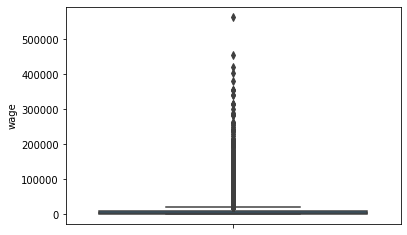

In [103]:
import seaborn as sns
sns.boxplot(data = df_fifa, y='wage')

In [ ]:
Q1 = np.percentile(y, q = [25])
Q1

array([1000.])

In [ ]:
Q3 = np.percentile(y, q = [75])
Q3

array([9000.])

In [ ]:
quartiles_wage = df_fifa['wage'].quantile([0.25,0.75]).to_list()

q1_wage = quartiles_wage[0]
q3_wage = quartiles_wage[1]
q1_wage

1000.0

In [ ]:
q3_wage

9000.0

In [ ]:
import seaborn as sns
sns.boxplot(y = a_wage)

Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

quartiles_wage = df_fifa['wage'].quantile([0.25,0.75]).to_list()

q1_wage = quartiles_wage[0]
q3_wage = quartiles_wage[1]

outlier_wage = q3_wage + (q3_wage - q1_wage) * 1.5

# ouliers superiores
df_fifa[df_fifa['wage'] > outlier_wage].sort_values(by='wage', ascending=False).head(5)

In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'
a_wage.sum()/18207

import seaborn as sns
sns.boxplot(y = a_wage)

Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'


In [ ]:
df_fifa[['wage']].values

array([[565000.],
       [405000.],
       [290000.],
       ...,
       [  1000.],
       [  1000.],
       [  1000.]])

In [ ]:
(df_fifa[['wage']].values).dtype

dtype('float64')

In [ ]:
df_wage = df_fifa[['name','wage']]

s_wage = df_fifa['wage']
a_wage = s_wage.values

is_nan = np.isnan(a_wage)

a_wage[is_nan]

a_club = df_fifa['club']

#f'Média: {np.mean(df_fifa[['wage']])}; Mediana: {np.median(df_fifa[['wage']])}; STD: {np.std(df_fifa[['wage']])}'
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'
a_wage.sum()/18207

import seaborn as sns
sns.boxplot(y = a_wage)

Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'


In [94]:
import seaborn as sns

In [ ]:
sns.bo

In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

'Média: 9731.312132696215; Mediana: 3000.0; STD: 21998.686253949738'

In [ ]:
df_fifa[['wage']]>lim_superior_outlier

,wage
ID,
158023,True
20801,True
190871,True
193080,True
192985,True
...,...
238813,False
243165,False
241638,False


In [ ]:
df_fifa[_207].sort_values(by='wage', ascending = False).head()

,unnamed: 0,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,...,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
176580,7,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,80000000.0,455000.0,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",NaN,2021,6'0,190lbs,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,90.0,89.0,84.0,...,71.0,68.0,68.0,68.0,71.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
177003,6,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,90.0,89.0,91.0,...,82.0,74.0,74.0,74.0,82.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,...,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
155862,8,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,74.0,75.0,78.0,...,87.0,90.0,90.0,90.0,87.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M


In [ ]:
type(lim_superior_outlier)

numpy.ndarray

In [ ]:
lim_superior_outlier

array([21000.])

In [ ]:
# df_Fifa2 tem 'Wage' sem notações e transformado de string para int64
df_wage = df_Fifa2[['Name','Wage']]

In [ ]:
s_wage = df_Fifa2['Wage']

In [ ]:
type(s_wage)

In [ ]:
a_wage = s_wage.values
a_wage

In [ ]:
len(a_wage)

In [ ]:
is_nan = np.isnan(a_wage)
is_nan


In [ ]:
a_wage[is_nan]

In [ ]:
a_club = df_Fifa['Club']
a_club

In [ ]:
aa = a_club.values
aa

In [ ]:
import numpy as np
aa == 'Nan'

In [ ]:
aa[_228]

In [ ]:
df_Fifa[_208]

In [ ]:
df_Fifa2[_205]

In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

In [ ]:
a_wage.sum()/18207

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns

# Boxplot antes dos "outliers"
sns.boxplot(y = a_wage)

In [ ]:
Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

In [ ]:
f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'

In [ ]:
len(_162)

In [ ]:
_140.values

In [ ]:
sum(_152)

In [ ]:
df_w = pd.DataFrame([])

In [ ]:
# 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
# 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
# 19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
# 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
# 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
# 22. Quem são os outliers em termos de salário?
# 23. Quem são os outliers em termos de potência no chute?